In [14]:
from pysatgeo import raster
import glob
import os
import rioxarray
import matplotlib.pyplot as plt
import numpy as np  

# Stack Rasters through time composite operation

In [2]:
index_path = r"E:\Geospatial_Pessoal\STAC_py"

raster_dir = fr"{index_path}\ndvi_output"

input_tiffs = glob.glob(os.path.join(raster_dir, '*.tiff')) + glob.glob(os.path.join(raster_dir, '*.tif'))

total_tiffs = len(input_tiffs)
print(f"Total number of TIFF files: {total_tiffs}")

input_tiffs


Total number of TIFF files: 12


['E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170105_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170108_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170115_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170118_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170125_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170309_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170316_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170405_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170702_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170712_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\NDVI_20170724_4326.tiff',
 'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\pedrogao_grande_mean_ndvi_2017.tiff']

In [8]:
tiff_files = input_tiffs
output_tiff = fr"{raster_dir}\pedrogao_grande_mean_ndvi_2017.tiff"
aoi_shapefile = r"E:\Geospatial_Pessoal\STAC_py\pedrogao_grande_area_ardida_2017.geojson"

## Calculate Average (mean) input tiffs

In [ ]:

raster.stack_rasters(tiff_files, output_tiff, aoi_shapefile, chunk_size=None, operation='mean')

Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170105_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170108_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170115_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170118_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170125_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170309_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170316_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170405_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170702_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\NDVI_20170712_4326.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\ndvi_output\N

'E:\\Geospatial_Pessoal\\STAC_py\\ndvi_output\\pedrogao_grande_mean_ndvi_2017.tiff'

# Apply k-means clustering
* Define Ideal Cluster number using silhouette score


c:\Users\fuji_\anaconda3\envs\pysatgeo\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Silhouette score for 2 clusters: 0.669
Silhouette score for 3 clusters: 0.503
Silhouette score for 4 clusters: 0.524
Silhouette score for 5 clusters: 0.517
Silhouette score for 6 clusters: 0.519
Silhouette score for 7 clusters: 0.522


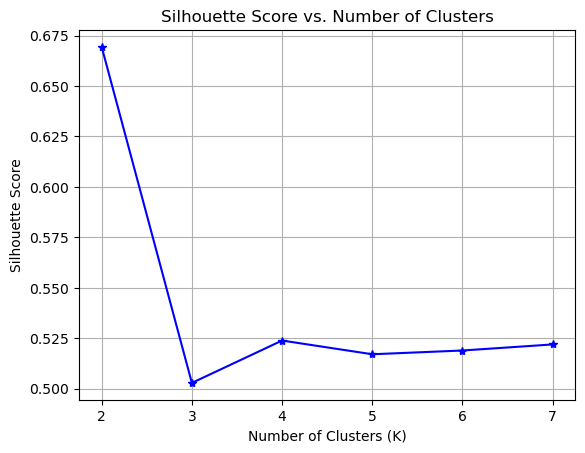

In [3]:
k_range=range(2, 8)

raster.process_raster_for_silhouette(fr"{index_path}\evi_output\EVI_20170724_4326.tiff", k_range=k_range)

* Redefine labels using mean value to mitigate extreme values or outliers.
* Apply n_clusters using the silhouette score plot
* Due to higher silhouette score with 2 clusters, this number will be used

In [3]:
input_directory = fr"{index_path}\evi_output"
output_directory = fr"{index_path}\evi_output\output_silhouette"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
else:
    print(f"{output_directory} already exists!")
    
raster.kmeans_relabel(input_directory, output_directory, n_clusters=2)

E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette already exists!
Processing E:\Geospatial_Pessoal\STAC_py\evi_output\EVI_20170105_4326.tiff


c:\Users\fuji_\anaconda3\envs\pysatgeo\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Cluster stats (based on means):
Cluster 1: mean=0.266, count=40,490
Cluster 2: mean=0.338, count=51,901
Means for each cluster before relabeling:
Old Cluster 1: mean=0.266, count=40,490
Old Cluster 2: mean=0.338, count=51,901

Cluster reordering based on means:
Old Cluster 1: mean=0.266, count=40,490 -> New Cluster 1
Old Cluster 2: mean=0.338, count=51,901 -> New Cluster 2
Relabeling output saved at E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170105_4326_relabeled.tiff
Processing E:\Geospatial_Pessoal\STAC_py\evi_output\EVI_20170108_4326.tiff
Cluster stats (based on means):
Cluster 1: mean=0.272, count=40,843
Cluster 2: mean=0.346, count=51,548
Means for each cluster before relabeling:
Old Cluster 1: mean=0.272, count=40,843
Old Cluster 2: mean=0.346, count=51,548

Cluster reordering based on means:
Old Cluster 1: mean=0.272, count=40,843 -> New Cluster 1
Old Cluster 2: mean=0.346, count=51,548 -> New Cluster 2
Relabeling output saved at E:\Geospatial_Pessoal\STAC_

## Calculate Average (mean) of all the relabelled rasters

In [6]:
raster_dir = output_directory

input_tiffs = glob.glob(os.path.join(raster_dir, '*.tiff')) + glob.glob(os.path.join(raster_dir, '*.tif'))

total_tiffs = len(input_tiffs)
print(f"Total number of TIFF files: {total_tiffs}")

filename_mean = "pedrogao_evi_kmeans_relabeled_mean_silhouette.tiff"
output_tiff_mean = os.path.join(output_directory, filename_mean)

raster.stack_rasters(input_tiffs, output_tiff_mean, aoi_shapefile=None, chunk_size=None, operation='mean')

Total number of TIFF files: 11
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170105_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170108_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170115_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170118_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170125_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170309_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170316_4326_relabeled.tiff
Starting the processing... E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\EVI_20170405_4326_relabeled.tiff
Starting the proc

c:\Users\fuji_\anaconda3\envs\pysatgeo\Lib\site-packages\osgeo\gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Stacked mean Raster saved at E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\pedrogao_evi_kmeans_relabeled_mean_silhouette.tiff


'E:\\Geospatial_Pessoal\\STAC_py\\evi_output\\output_silhouette\\pedrogao_evi_kmeans_relabeled_mean_silhouette.tiff'

## Convert raster float values to integer

In [7]:
filename_mean_int = "pedrogao_evi_kmeans_relabeled_mean_integer.tiff"

output_tiff_mean_integer = os.path.join(output_directory, filename_mean_int)

raster.convert_raster_to_integers(output_tiff_mean, output_tiff_mean_integer)

Raster with integer dataype saved at E:\Geospatial_Pessoal\STAC_py\evi_output\output_silhouette\pedrogao_evi_kmeans_relabeled_mean_integer.tiff


## Plot kmean averaged integer EVI

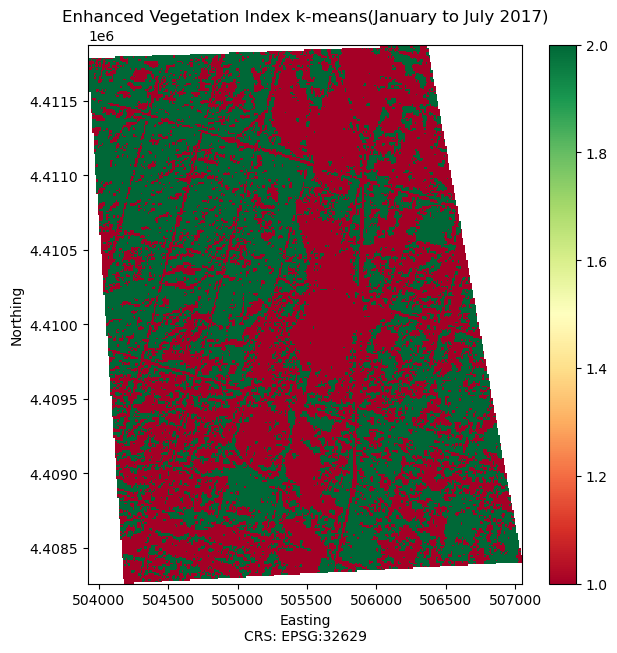

In [18]:
evi_raster = rioxarray.open_rasterio(output_tiff_mean_integer)
evi_raster = evi_raster.rio.reproject("EPSG:32629", inplace=True)

evi_masked = evi_raster.where(evi_raster != evi_raster.rio.nodata)

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
evi_masked.plot(cmap='RdYlGn' , vmin=np.nanmin(evi_masked), vmax=np.nanmax(evi_masked))
plt.title('Enhanced Vegetation Index k-means(January to July 2017)')
plt.xlabel(f'Easting\nCRS: {evi_raster.rio.crs}')
plt.ylabel('Northing')

plt.show()